In [1]:
import numpy as np
import time
import cvxpy as cp
import pandas as pd
from math import log10
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from contracts import get_contract, get_contract_non_tract, l_transpose, get_contract_customtypes

In [3]:
l_times_tract = []
l_times_non_tract = []
l_type = []
types = list(range(1,21))
trials = 5

In [3]:
for num_types in tqdm(types):
    for trial in range(trials):
        tract_s = time.time()
        get_contract(num_types)
        tract_e = time.time()
        
        ntract_s = time.time()
        get_contract_non_tract(num_types)
        ntract_e = time.time()
        
        l_times_tract.append(tract_e-tract_s)
        l_times_non_tract.append(ntract_e-ntract_s)
        l_type.append(num_types)

  0%|          | 0/20 [00:00<?, ?it/s]

In [4]:
data = l_transpose([l_type, l_times_tract, l_times_non_tract])
df_runtime = pd.DataFrame(data = data,
                          columns = ["type", "tract", "non_tract"]
                         )

gdf_runtime = df_runtime.groupby("type").agg(tract_avg = ("tract", np.mean),
                                             tract_std = ("tract", np.std),
                                             non_tract_avg = ("non_tract", np.mean),
                                             non_tract_std = ("non_tract", np.std)
                                            ).reset_index()

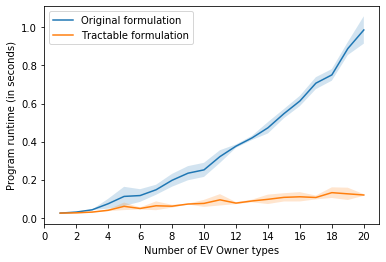

In [5]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(gdf_runtime["type"].values,
         gdf_runtime["non_tract_avg"].values,
         label = 'Original formulation')

ax1.fill_between(gdf_runtime["type"].values,
         gdf_runtime["non_tract_avg"].values - gdf_runtime["non_tract_std"].values,
         gdf_runtime["non_tract_avg"].values + gdf_runtime["non_tract_std"].values,
         alpha = 0.2
         )

ax1.plot(gdf_runtime["type"].values,
         gdf_runtime["tract_avg"].values,
         label = 'Tractable formulation')

ax1.fill_between(gdf_runtime["type"].values,
         gdf_runtime["tract_avg"].values - gdf_runtime["tract_std"].values,
         gdf_runtime["tract_avg"].values + gdf_runtime["tract_std"].values,
         alpha = 0.2
         )

ax1.set_xticks(np.arange(0,21, 2))
ax1.set_xlabel("Number of EV Owner types")
ax1.set_ylabel("Program runtime (in seconds)")
ax1.legend(loc='upper left')

In [5]:
for num_types in tqdm(types):
    for trial in range(trials):
        tract_s = time.time()
        get_contract_customtypes(np.logspace(log10(0.5), log10(10), num_types))
        tract_e = time.time()
        
        ntract_s = time.time()
        get_contract_non_tract(num_types)
        ntract_e = time.time()
        
        l_times_tract.append(tract_e-tract_s)
        l_times_non_tract.append(ntract_e-ntract_s)
        l_type.append(num_types)

  0%|          | 0/20 [00:00<?, ?it/s]

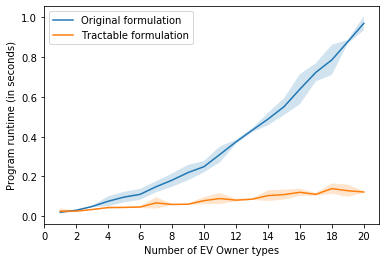

In [6]:
data = l_transpose([l_type, l_times_tract, l_times_non_tract])
df_runtime = pd.DataFrame(data = data,
                          columns = ["type", "tract", "non_tract"]
                         )

gdf_runtime = df_runtime.groupby("type").agg(tract_avg = ("tract", np.mean),
                                             tract_std = ("tract", np.std),
                                             non_tract_avg = ("non_tract", np.mean),
                                             non_tract_std = ("non_tract", np.std)
                                            ).reset_index()

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)
ax1.plot(gdf_runtime["type"].values,
         gdf_runtime["non_tract_avg"].values,
         label = 'Original formulation')

ax1.fill_between(gdf_runtime["type"].values,
         gdf_runtime["non_tract_avg"].values - gdf_runtime["non_tract_std"].values,
         gdf_runtime["non_tract_avg"].values + gdf_runtime["non_tract_std"].values,
         alpha = 0.2
         )

ax1.plot(gdf_runtime["type"].values,
         gdf_runtime["tract_avg"].values,
         label = 'Tractable formulation')

ax1.fill_between(gdf_runtime["type"].values,
         gdf_runtime["tract_avg"].values - gdf_runtime["tract_std"].values,
         gdf_runtime["tract_avg"].values + gdf_runtime["tract_std"].values,
         alpha = 0.2
         )

ax1.set_xticks(np.arange(0,21, 2))
ax1.set_xlabel("Number of EV Owner types")
ax1.set_ylabel("Program runtime (in seconds)")
ax1.legend(loc='upper left')